# Metadata of Lake CCI lakes

Data downloaded from: https://climate.esa.int/documents/2607/lakescci_v2.1.0_metadata.csv
- Downloaded on 2025-10-09
- Found at https://climate.esa.int/en/projects/lakes/ -> Data tab -> link within Data Coverage section

User guide for the data product: https://climate.esa.int/media/documents/CCI-LAKES2-0021-PUG-v2.1.1.pdf
- Found at https://climate.esa.int/en/projects/lakes/ -> Key Documents tab -> Phase 2 table -> link for Product User Guide
- Version 2.1.1 issued 2024-04-04

Differences between .csv and .shp files
- csv has snake_case headers, shp has mix of PascalCase and snake_case headers
- type count discrepancy:

|Type | csv | shp|
|---|-----|----|
|Lake | 1700| 1687|
|Reservoir |324| 324|
|TBC|0| 13|
|Total|2024|2024|

- lwe discrepancy:

|Cat | csv | shp|
|---|-----|----|
|great_0_5     |102|107|
|less_0_5      | 90|100|
|nan_sat       |258|258|
|nan_qc        |165|165 |
|nan_tba      |1409|1394|

- Consistent between csv and shp file
   - [x] lwl_data	
   - [-] lwe_data
   - [x] lswt_data	
   - [x] lic_data
   - [x] lwlr_data	

In [ ]:
import numpy as np
import pandas as pd
import geopandas as gpd
from shapely import Polygon, Point
from matplotlib.colors import LinearSegmentedColormap, ListedColormap
from matplotlib import colormaps
from codebase import constants as c
from codebase import ROOT

## Load and define data

In [ ]:
## Acronyms
var_name_dict = {'lwl':'Lake Water Level',
                 'lwe':'Lake Water Extent',
                 'lswt':'Lake Surface Water Temperature',
                 'lic':'Lake Ice Cover',
                 'lwlr':'Lake Water Leaving Reflectance'}

# My guess at the categories based on the website description. Confirmed data flag labels by recreating maps.
data_cat_long_dict = {0:f'Data available at least 50% in most recent 16 years',
                 1:f'Data available less than 50% in most recent 16 years',
                 2:'No observations from satellites',
                 3:'No observations due to poor data quality or coverage',
                 4:'Lakes being considered for future data releases'}

data_cat_short_dict = {0:'great_0_5',
                 1:'less_0_5',
                 2:'nan_sat',
                 3:'nan_qc',
                 4:'nan_tba'}

In [11]:
lake_meta = gpd.read_file(ROOT/'data'/'auxiliary'/'lakescci_v2.1.0_data-availability.shp')
# lake_meta.set_index('id',inplace=True)
# lake_meta.set_crs(4326,inplace=True)

In [13]:
lake_meta_df = pd.read_csv(ROOT/'data'/'auxiliary'/'lakescci_v2.1.0_metadata.csv',delimiter=';',index_col='id')

In [14]:
lake_meta.head(2)

,id,short_name,name,lat_centre,lon_centre,country,MaxDist,LatMinBox,LatMaxBox,LonMinBox,LonMaxBox,lwl_data,lwe_data,lswt_data,lic_data,lwlr_data,type,geometry
0,2,GLWD00000002,Superior,"47,9625","-87,0431",United States;Canada,73.5,46.3708,49.0542,-92.2542,-84.3125,0,4,0,0,0,Lake,"MULTIPOLYGON (((-92.27778 46.65417, -92.27223 ..."
1,3,GLWD00000003,Victoria,"-0,8764","33,1431",Tanzania United Republic of;Uganda;Kenya,84.1,-3.0542,0.5292,31.5625,34.9042,0,4,0,0,0,Lake,"MULTIPOLYGON (((31.6986 -0.85555, 31.6986 -0.8..."


## Define helper functions

In [15]:
# 'LatMinBox', 'LatMaxBox', 'LonMinBox', 'LonMaxBox'
def polygon_from_bbox(minx,miny,maxx,maxy):
    coords_tuple = ((minx,miny),(maxx,miny),(maxx,maxy),(minx,maxy),(minx,miny))
    polygon = Polygon(coords_tuple)
    return polygon

In [16]:
def print_data_availability(pd_series):
    avail_count = pd_series.value_counts().sort_index()
    avail_frac = avail_count/avail_count.sum()
   
    print('Dataset count\n-----\n',avail_count.rename(index=data_cat_short_dict))
    print('\n')
    print('Dataset fraction\n-----\n',avail_frac.rename(index=data_cat_short_dict).round(4))
    print('\n')

## Distributions of variables

In [17]:
lake_meta.shape

(2024, 18)

In [18]:
# Lake type
type_count = lake_meta['type'].value_counts()
type_frac = type_count/type_count.sum()

print('Dataset count\n-----\n',type_count)
print('\n')
print('Dataset fraction\n-----\n',type_frac.round(3))

Dataset count
-----
 type
Lake         1687
Reservoir     324
TBC            13
Name: count, dtype: int64


Dataset fraction
-----
 type
Lake         0.833
Reservoir    0.160
TBC          0.006
Name: count, dtype: float64


In [19]:
print_data_availability(lake_meta['lwl_data'])

Dataset count
-----
 lwl_data
great_0_5     167
less_0_5      331
nan_sat       258
nan_qc        165
nan_tba      1103
Name: count, dtype: int64


Dataset fraction
-----
 lwl_data
great_0_5    0.0825
less_0_5     0.1635
nan_sat      0.1275
nan_qc       0.0815
nan_tba      0.5450
Name: count, dtype: float64




In [20]:
print_data_availability(lake_meta['lwe_data'])

Dataset count
-----
 lwe_data
great_0_5     107
less_0_5      100
nan_sat       258
nan_qc        165
nan_tba      1394
Name: count, dtype: int64


Dataset fraction
-----
 lwe_data
great_0_5    0.0529
less_0_5     0.0494
nan_sat      0.1275
nan_qc       0.0815
nan_tba      0.6887
Name: count, dtype: float64




In [21]:
print_data_availability(lake_meta['lswt_data'])


Dataset count
-----
 lswt_data
great_0_5    1929
nan_sat        12
nan_tba        83
Name: count, dtype: int64


Dataset fraction
-----
 lswt_data
great_0_5    0.9531
nan_sat      0.0059
nan_tba      0.0410
Name: count, dtype: float64




In [22]:
print_data_availability(lake_meta['lic_data'])

Dataset count
-----
 lic_data
great_0_5    2024
Name: count, dtype: int64


Dataset fraction
-----
 lic_data
great_0_5    1.0
Name: count, dtype: float64




In [23]:
print_data_availability(lake_meta['lwlr_data'])

Dataset count
-----
 lwlr_data
great_0_5    2024
Name: count, dtype: int64


Dataset fraction
-----
 lwlr_data
great_0_5    1.0
Name: count, dtype: float64




In [ ]:
ax = lake_meta['MaxDist'].hist(log=True,edgecolor='black')
ax.set_ylabel('Count')
ax.set_xlabel('Max distance to land')

## Data queries / Lakes of interest

In [ ]:
lake_meta.sort_values(by='MaxDist',ascending=False).head(7)

In [ ]:
def isolate_by_bbox_range(minx,miny,maxx,maxy,df):
    lat_range = (df['lat centre'] >= miny) & (df['lat centre'] <= maxy)
    lon_range = (df['lon centre'] >= minx) & (df['lon centre'] <= maxx)
    df_isolate = df.loc[lat_range*lon_range]
    return df_isolate

In [ ]:
def isolate_by_country_name(country_name,df):
    df_isolate = df.loc[df['country'].str.contains(country_name)]
    return df_isolate

In [ ]:
def isolate_by_latlon_point(latlon_tuple, df):
    lat_val = latlon_tuple[0]
    lon_val = latlon_tuple[1]
    lat_range = (df['lat_min_box'] <= lat_val) & (df['lat_max_box'] >= lat_val)
    lon_range = (df['lon_min_box'] <= lon_val) & (df['lon_max_box'] >= lon_val)
    df_isolate = df.loc[lat_range*lon_range]
    return df_isolate


In [ ]:
bbox = (-95.7,29.63,-92.9,33.32) # minx, miny, maxx, maxy
# isolate_by_bbox_range(*bbox,df)

In [ ]:
easttex_poly = polygon_from_bbox(*bbox)

In [ ]:
easttex_gdf = lake_meta.loc[lake_meta.intersects(easttex_poly)]

In [ ]:
# m = easttex_gdf.explore(tooltip=['name'])
# m

In [ ]:
latlon_OI = (32.69,-94.04)
isolate_by_latlon_point(latlon_OI,lake_meta)

In [ ]:
isolate_by_country_name('United States', lake_meta).head()

## Confirm ESA data flag categories
ESA data description (https://climate.esa.int/en/projects/lakes/) does not map the five descriptive data availability classifications to the numeric classifications.

Confirmed that the implied order is correct by recreating the maps available on the ESA website:\
                {0:f'Data available at least 50% in most recent 16 years',\
                 1:f'Data available less than 50% in most recent 16 years',\
                 2:'No observations from satellites',\
                 3:'No observations due to poor data quality or coverage',\
                 4:'Lakes being considered for future data releases'} 

In [46]:
lake_meta[['lwl_data','lwe_data','lwst_data','lic_data','lwlr_data']] = lake_meta[['lwl_data','lwe_data','lswt_data','lic_data','lwlr_data']].astype('category')

In [31]:
lake_meta['lat_centre'] = lake_meta['lat_centre'].replace(',','.',regex=True).astype(float)
lake_meta['lon_centre'] = lake_meta['lon_centre'].replace(',','.',regex=True).astype(float)


In [47]:
lake_points = gpd.GeoDataFrame(lake_meta,geometry=gpd.points_from_xy(lake_meta['lon_centre'], lake_meta['lat_centre']), crs="EPSG:4326")

In [55]:
cat_c = np.array([[0,0.3,0],
          [0,0.8,0],
          [0,0,0],
          [1,0,0],
          [1,0.7,0]])

In [67]:
esa_cmap = ListedColormap(cat_c,'esa_data_flag')
my_cmap = colormaps.register(esa_cmap)

<Axes: >

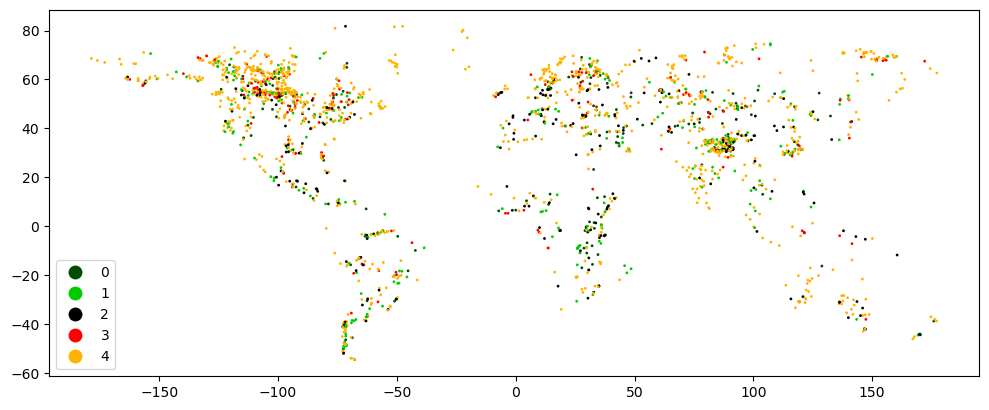

In [68]:
lake_points.plot('lwl_data',legend =True,s=1,figsize=(12,8),cmap='esa_data_flag')

<Axes: >

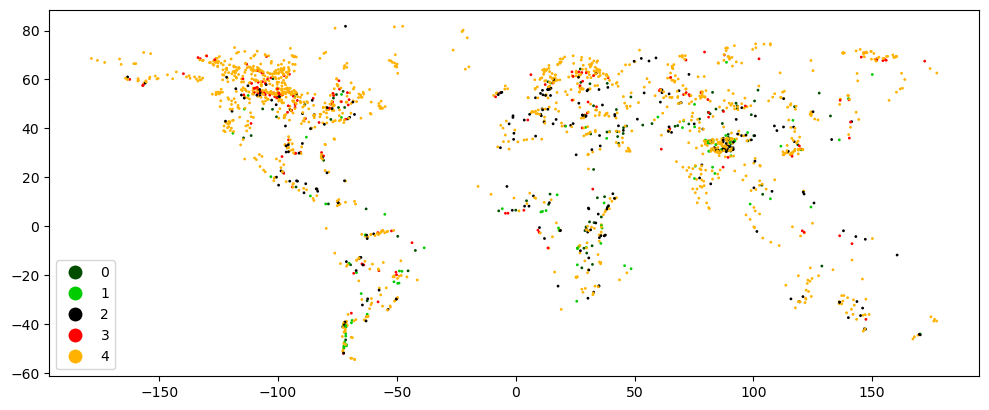

In [69]:
lake_points.plot('lwe_data',legend =True,s=1,figsize=(12,8),cmap='esa_data_flag')

<Axes: >

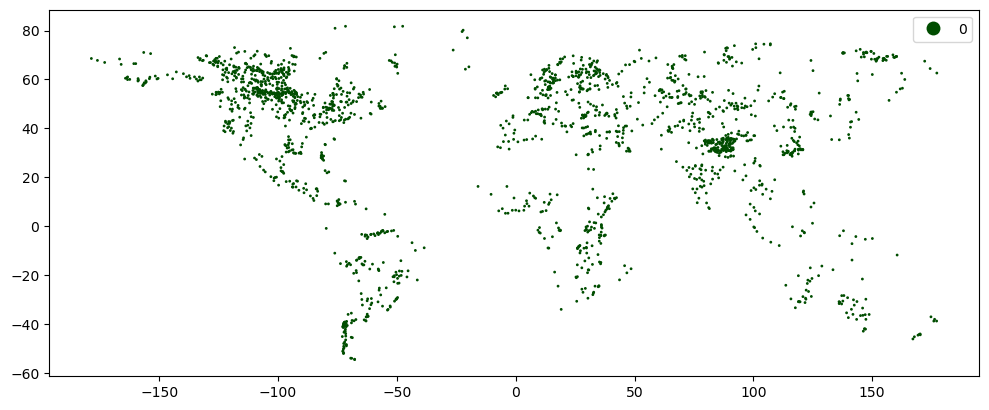

In [70]:
lake_points.plot('lic_data',legend =True,s=1,figsize=(12,8),cmap='esa_data_flag')

## Scratchwork

## Testing out lakecci_functions version
Works in the notebook, not in the script :(

In [ ]:
path_shp = ROOT.joinpath(c.PATH_AUXILIARY).joinpath(c.FN_SHP)
meta_full_shp = gpd.read_file(path_shp)

In [ ]:
lakeid = 6
extra_lakes = [2,5]

In [ ]:
lakes_to_extract = [lakeid , *extra_lakes]

In [ ]:
meta_shp = meta_full_shp.loc[meta_full_shp['id'].isin(lakes_to_extract)]

In [ ]:
meta_shp.bounds

In [ ]:
meta_shp.union_all().bounds